## UNSUPERVISED MACHINE LEARNING

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer
!pip install plotly
import plotly.graph_objs as go
import plotly.offline as po
from plotly.subplots import make_subplots
po.init_notebook_mode()
import plotly.express as px
!pip install prince
from prince import FAMD
from sklearn.manifold import TSNE
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder
!pip install gower
import gower

import warnings
warnings.filterwarnings("ignore")

In [165]:
df = pd.read_csv('Company_Employee.csv')

## renaming columns to easier names
df.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status' ]
df

Age  Gender    Business Travel            Job Function  Distance  \
0      41  Female      Travel_Rarely                   Sales         1   
1      49    Male  Travel_Frequently  Research & Development         8   
2      37    Male      Travel_Rarely  Research & Development         2   
3      33  Female  Travel_Frequently  Research & Development         3   
4      27    Male      Travel_Rarely  Research & Development         2   
...   ...     ...                ...                     ...       ...   
1465   36    Male  Travel_Frequently  Research & Development        23   
1466   39    Male      Travel_Rarely  Research & Development         6   
1467   27    Male      Travel_Rarely  Research & Development         4   
1468   49    Male  Travel_Frequently                   Sales         2   
1469   34    Male      Travel_Rarely  Research & Development         8   

      Education  Job Satisfaction Marital Status  Salary  Performance Rating  \
0             2                 4         Single    5993                   3   
1             1                 2        Married    5130                   4   
2             2                 3         Single    2090                   3   
3             4                 3        Married    2909                   3   
4             1                 2        Married    3468                   3   
...         ...               ...            ...     ...                 ...   
1465          2                 4        Married    2571                   3   
1466          1                 1        Married    9991                   3   
1467          3                 2        Married    6142                   4   
1468          3                 2        Married    5390                   3   
1469          3                 3        Married    4404                   3   

      WLB  Service Resign Status  
0       1        6           Yes  
1       3       10            No  
2       3        0           Yes  
3       3        8            No  
4       3        2            No  
...   ...      ...           ...  
1465    3        5            No  
1466    3        7            No  
1467    3        6            No  
1468    2        9            No  
1469    4        4            No  

[1470 rows x 13 columns]

### Data Exploration

In [463]:
## checking for null values in the dataset
df.isnull().sum()

Age                   0
Gender                0
Business Travel       0
Job Function          0
Distance              0
Education             0
Job Satisfaction      0
Marital Status        0
Salary                0
Performance Rating    0
WLB                   0
Service               0
Resign Status         0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

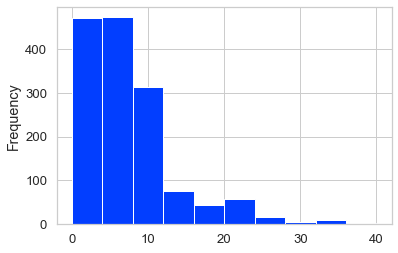

In [464]:
df['Service'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

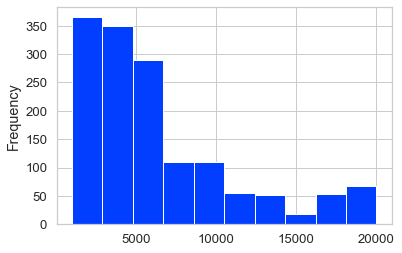

In [465]:
df['Salary'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

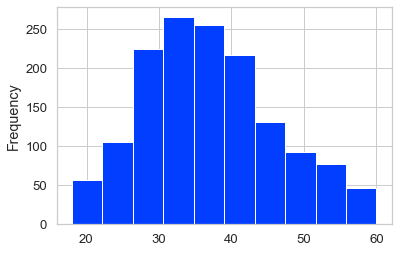

In [466]:
df['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

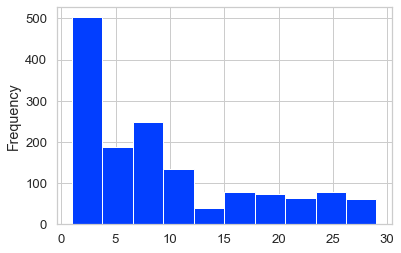

In [467]:
df['Distance'].plot(kind='hist')

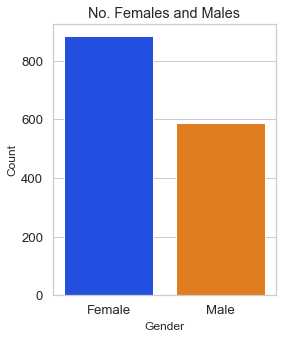

In [468]:
count = df['Gender'].value_counts()
plt.figure(figsize=(4,5))
sns.barplot(['Female','Male'], count.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title("No. Females and Males")
plt.show()

In [469]:
X = df
X.var()

Age                   8.345505e+01
Distance              6.572125e+01
Education             1.048914e+00
Job Satisfaction      1.216270e+00
Salary                2.216486e+07
Performance Rating    1.301936e-01
WLB                   4.991081e-01
Service               3.753431e+01
dtype: float64

### DATA PREPROCESSING

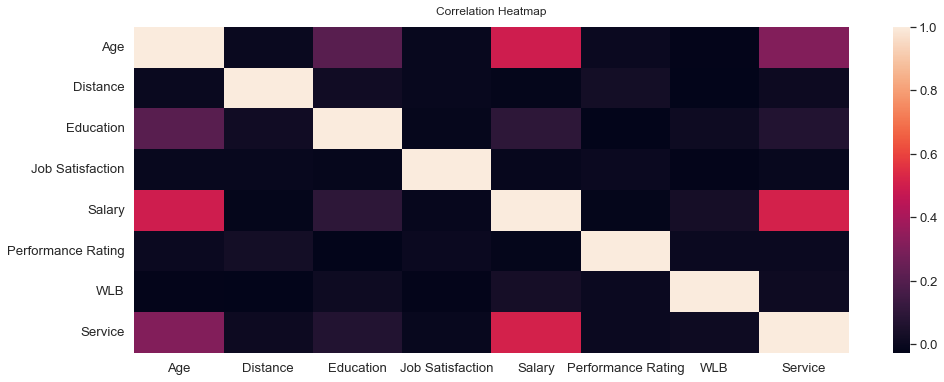

In [470]:
## plot correlation heatmap to visually analyse correlation between variables
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Age, Martial Status, Salary and Service looks to have close to no correlation with Resign Status.
## Despite having almost no correlation, it does not make sense for variables such as age and salary
## to have no effect on resign status.

### KMeans with only continuous variables

In [246]:
X = df.drop(columns=['Gender', 'Business Travel', 'Job Function', 'Marital Status', 'Resign Status'])

In [247]:
scaler = StandardScaler()  
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Age', 'Distance', 'Education', 'Job Satisfaction', 'Salary', 'Performance Rating', 'WLB', 'Service'])
X

Age  Distance  Education  Job Satisfaction    Salary  \
0     0.446350 -1.010909  -0.891688          1.153254 -0.108350   
1     1.322365 -0.147150  -1.868426         -0.660853 -0.291719   
2     0.008343 -0.887515  -0.891688          0.246200 -0.937654   
3    -0.429664 -0.764121   1.061787          0.246200 -0.763634   
4    -1.086676 -0.887515  -1.868426         -0.660853 -0.644858   
...        ...       ...        ...               ...       ...   
1465 -0.101159  1.703764  -0.891688          1.153254 -0.835451   
1466  0.227347 -0.393938  -1.868426         -1.567907  0.741140   
1467 -1.086676 -0.640727   0.085049         -0.660853 -0.076690   
1468  1.322365 -0.887515   0.085049         -0.660853 -0.236474   
1469 -0.320163 -0.147150   0.085049          0.246200 -0.445978   

      Performance Rating       WLB   Service  
0              -0.426230 -2.493820 -0.164613  
1               2.346151  0.338096  0.488508  
2              -0.426230  0.338096 -1.144294  
3              -0.426230  0.338096  0.161947  
4              -0.426230  0.338096 -0.817734  
...                  ...       ...       ...  
1465           -0.426230  0.338096 -0.327893  
1466           -0.426230  0.338096 -0.001333  
1467            2.346151  0.338096 -0.164613  
1468           -0.426230 -1.077862  0.325228  
1469           -0.426230  1.754054 -0.491174  

[1470 rows x 8 columns]

In [248]:
## obtaining silhouette coefficient to predict optimal number of clusters
## manhattan distance is used when high dimensional data, else use euclidean
for n_cluster in range(2, 11): 
    kmeans = KMeans(n_clusters=n_cluster).fit(X) 
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(X, label, metric='euclidean') 
    print("For n_clusters={}, The Silhouette Coefficient is {}".format( 
            n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.21616293156195127
For n_clusters=3, The Silhouette Coefficient is 0.22823922034883964
For n_clusters=4, The Silhouette Coefficient is 0.13565131920319823
For n_clusters=5, The Silhouette Coefficient is 0.14121289312607788
For n_clusters=6, The Silhouette Coefficient is 0.14447863054380897
For n_clusters=7, The Silhouette Coefficient is 0.14994702118695044
For n_clusters=8, The Silhouette Coefficient is 0.14783913362637774
For n_clusters=9, The Silhouette Coefficient is 0.15032215429262197
For n_clusters=10, The Silhouette Coefficient is 0.14866243311755725


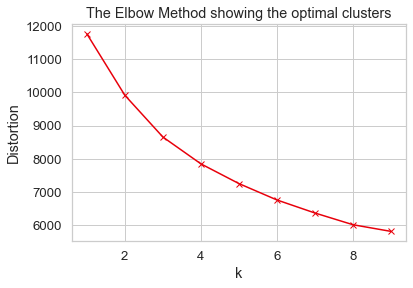

In [476]:
## plot the elbow plot to identify optimal number of clusters
## distance = large if inertia is large
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'rx-')
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal clusters")
plt.show()

KMeans(n_clusters=2)


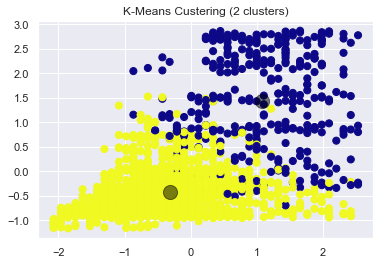

In [249]:
## k means clustering (2 clusters)
km = KMeans(n_clusters=2) 
km.fit(X) 
print(km)

## visualise results
y_kmeans = km.predict(X) 
plt.scatter(X.iloc[:, 0], X.iloc[:, 4], c=y_kmeans, s=50, cmap='plasma') 

centers = km.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 4], c='black', s=200, alpha=0.5)
plt.title("K-Means Custering (2 clusters)")
plt.show()

KMeans(n_clusters=3)


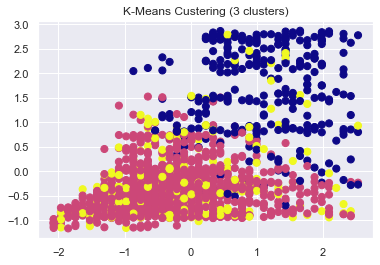

In [250]:
## k means clustering (3 clusters)
km = KMeans(n_clusters=3) 
km.fit(X) 
print(km)

## visualise results
y_kmeans = km.predict(X) 
plt.scatter(X.iloc[:, 0], X.iloc[:, 4], c=y_kmeans, s=50, cmap='plasma') 

plt.title("K-Means Custering (3 clusters)")
plt.show()

### KMeans + Encoded Categorical

In [251]:
X = pd.read_csv('Company_Employee.csv')

## renaming columns to easier names
X.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status' ]
X

Age  Gender    Business Travel            Job Function  Distance  \
0      41  Female      Travel_Rarely                   Sales         1   
1      49    Male  Travel_Frequently  Research & Development         8   
2      37    Male      Travel_Rarely  Research & Development         2   
3      33  Female  Travel_Frequently  Research & Development         3   
4      27    Male      Travel_Rarely  Research & Development         2   
...   ...     ...                ...                     ...       ...   
1465   36    Male  Travel_Frequently  Research & Development        23   
1466   39    Male      Travel_Rarely  Research & Development         6   
1467   27    Male      Travel_Rarely  Research & Development         4   
1468   49    Male  Travel_Frequently                   Sales         2   
1469   34    Male      Travel_Rarely  Research & Development         8   

      Education  Job Satisfaction Marital Status  Salary  Performance Rating  \
0             2                 4         Single    5993                   3   
1             1                 2        Married    5130                   4   
2             2                 3         Single    2090                   3   
3             4                 3        Married    2909                   3   
4             1                 2        Married    3468                   3   
...         ...               ...            ...     ...                 ...   
1465          2                 4        Married    2571                   3   
1466          1                 1        Married    9991                   3   
1467          3                 2        Married    6142                   4   
1468          3                 2        Married    5390                   3   
1469          3                 3        Married    4404                   3   

      WLB  Service Resign Status  
0       1        6           Yes  
1       3       10            No  
2       3        0           Yes  
3       3        8            No  
4       3        2            No  
...   ...      ...           ...  
1465    3        5            No  
1466    3        7            No  
1467    3        6            No  
1468    2        9            No  
1469    4        4            No  

[1470 rows x 13 columns]

In [252]:
## deal with 'Business Travel' column
bt = X['Business Travel']
for i in range(len(bt)):
    if bt[i] == 'Non-Travel':
        bt.loc[i] = 1
    elif bt[i] == 'Travel_Rarely':
        bt.loc[i] = 2
    elif bt[i] == 'Travel_Frequently':
        bt.loc[i] = 3
        
X['Business Travel'] = X['Business Travel'].astype('int')


## deal with 'Job Function' column
jf = X['Job Function']
for i in range(len(jf)):
    if jf[i] == 'Sales':
        jf.loc[i] = 1
    elif jf[i] == 'Research & Development':
        jf.loc[i] = 2
    elif jf[i] == 'Human Resources':
        jf.loc[i] = 3
        
X['Job Function'] = X['Job Function'].astype('int')  


## deal with 'Marital Status' column
ms = X['Marital Status']
for i in range(len(ms)):
    if ms[i] == 'Single':
        ms.loc[i] = 1
    elif ms[i] == 'Married':
        ms.loc[i] = 2
    elif ms[i] == 'Divorced':
        ms.loc[i] = 3

X['Marital Status'] = X['Marital Status'].astype('int')


## deal with 'Resign Status' column
rs = X['Resign Status']
for i in range(len(rs)):
    if rs[i] == 'No':
        rs.loc[i] = 0
    elif rs[i] == 'Yes':
        rs.loc[i] = 1
    
X['Resign Status'] = X['Resign Status'].astype('int')

## deal with 'Gender' column
gender = X['Gender']
for i in range(len(gender)):
    if gender[i] == 'Female':
        gender.loc[i] = 1
    elif gender[i] == 'Male':
        gender.loc[i] = 2

X['Gender'] = X['Gender'].astype('int')

In [253]:
scaler = StandardScaler()  
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status','Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status'])
X

Age    Gender  Business Travel  Job Function  Distance  Education  \
0     0.446350 -1.224745        -0.162399     -1.401512 -1.010909  -0.891688   
1     1.322365  0.816497         1.717339      0.493817 -0.147150  -1.868426   
2     0.008343  0.816497        -0.162399      0.493817 -0.887515  -0.891688   
3    -0.429664 -1.224745         1.717339      0.493817 -0.764121   1.061787   
4    -1.086676  0.816497        -0.162399      0.493817 -0.887515  -1.868426   
...        ...       ...              ...           ...       ...        ...   
1465 -0.101159  0.816497         1.717339      0.493817  1.703764  -0.891688   
1466  0.227347  0.816497        -0.162399      0.493817 -0.393938  -1.868426   
1467 -1.086676  0.816497        -0.162399      0.493817 -0.640727   0.085049   
1468  1.322365  0.816497         1.717339     -1.401512 -0.887515   0.085049   
1469 -0.320163  0.816497        -0.162399      0.493817 -0.147150   0.085049   

      Job Satisfaction  Marital Status    Salary  Performance Rating  \
0             1.153254       -1.236820 -0.108350           -0.426230   
1            -0.660853        0.133282 -0.291719            2.346151   
2             0.246200       -1.236820 -0.937654           -0.426230   
3             0.246200        0.133282 -0.763634           -0.426230   
4            -0.660853        0.133282 -0.644858           -0.426230   
...                ...             ...       ...                 ...   
1465          1.153254        0.133282 -0.835451           -0.426230   
1466         -1.567907        0.133282  0.741140           -0.426230   
1467         -0.660853        0.133282 -0.076690            2.346151   
1468         -0.660853        0.133282 -0.236474           -0.426230   
1469          0.246200        0.133282 -0.445978           -0.426230   

           WLB   Service  Resign Status  
0    -2.493820 -0.164613       2.280906  
1     0.338096  0.488508      -0.438422  
2     0.338096 -1.144294       2.280906  
3     0.338096  0.161947      -0.438422  
4     0.338096 -0.817734      -0.438422  
...        ...       ...            ...  
1465  0.338096 -0.327893      -0.438422  
1466  0.338096 -0.001333      -0.438422  
1467  0.338096 -0.164613      -0.438422  
1468 -1.077862  0.325228      -0.438422  
1469  1.754054 -0.491174      -0.438422  

[1470 rows x 13 columns]

In [868]:
## obtaining silhouette coefficient to predict optimal number of clusters
## manhattan distance is used when high dimensional data, else use euclidean
for n_cluster in range(2, 11): 
    kmeans = KMeans(n_clusters=n_cluster).fit(X) 
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(X, label, metric='euclidean') 
    print("For n_clusters={}, The Silhouette Coefficient is {}".format( 
            n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.14188768315109895
For n_clusters=3, The Silhouette Coefficient is 0.14235502703623595
For n_clusters=4, The Silhouette Coefficient is 0.09971926236349832
For n_clusters=5, The Silhouette Coefficient is 0.10223488048687629
For n_clusters=6, The Silhouette Coefficient is 0.09266370145219849
For n_clusters=7, The Silhouette Coefficient is 0.09681287487682008
For n_clusters=8, The Silhouette Coefficient is 0.08494986758908761
For n_clusters=9, The Silhouette Coefficient is 0.08634428170362773
For n_clusters=10, The Silhouette Coefficient is 0.08643440676643024


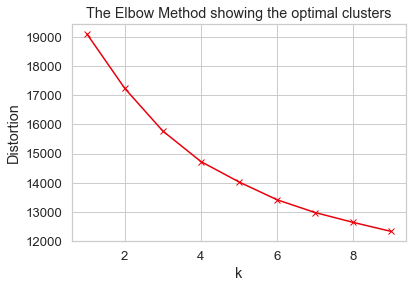

In [869]:
## plot the elbow plot to identify optimal number of clusters
## distance = large if inertia is large
## the lower the better
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'rx-')
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal clusters")
plt.show()

KMeans(n_clusters=2)


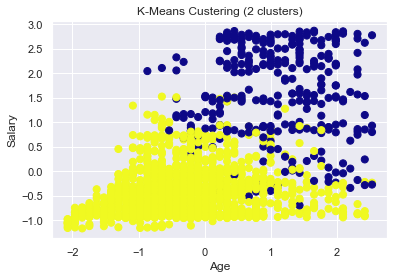

In [254]:
## k means clustering (2 clusters)
km = KMeans(n_clusters=2) 
km.fit(X) 
print(km)

## visualise results
clusters = km.predict(X) 
plt.scatter(X.iloc[:, 0], X.iloc[:, 8], c=clusters, s=50, cmap='plasma') 
X['cluster'] = clusters
plt.title("K-Means Custering (2 clusters)")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

KMeans(n_clusters=3)


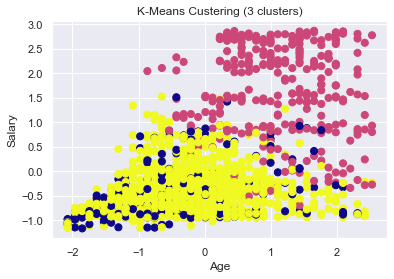

In [255]:
## k means clustering (3 clusters)
km = KMeans(n_clusters=3) 
km.fit(X) 
print(km)

## visualise results
clusters = km.predict(X) 
plt.scatter(X.iloc[:, 0], X.iloc[:, 8], c=clusters, s=50, cmap='plasma') 
X['cluster'] = clusters
plt.title("K-Means Custering (3 clusters)")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

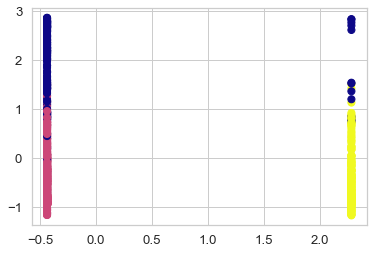

In [484]:
plt.scatter(X['Resign Status'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

### FAMD

In [166]:
X = pd.read_csv('Company_Employee.csv')

## renaming columns to easier names
X.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status' ]

In [167]:
scaled_X = StandardScaler().fit_transform(X[['Age', 'Distance', 'Education', 'Job Satisfaction', 'Salary', 'Performance Rating', 'WLB', 'Service']])
X[['Age', 'Distance', 'Education', 'Job Satisfaction', 'Salary', 'Performance Rating', 'WLB', 'Service']] = scaled_X
X

Age  Gender    Business Travel            Job Function  Distance  \
0     0.446350  Female      Travel_Rarely                   Sales -1.010909   
1     1.322365    Male  Travel_Frequently  Research & Development -0.147150   
2     0.008343    Male      Travel_Rarely  Research & Development -0.887515   
3    -0.429664  Female  Travel_Frequently  Research & Development -0.764121   
4    -1.086676    Male      Travel_Rarely  Research & Development -0.887515   
...        ...     ...                ...                     ...       ...   
1465 -0.101159    Male  Travel_Frequently  Research & Development  1.703764   
1466  0.227347    Male      Travel_Rarely  Research & Development -0.393938   
1467 -1.086676    Male      Travel_Rarely  Research & Development -0.640727   
1468  1.322365    Male  Travel_Frequently                   Sales -0.887515   
1469 -0.320163    Male      Travel_Rarely  Research & Development -0.147150   

      Education  Job Satisfaction Marital Status    Salary  \
0     -0.891688          1.153254         Single -0.108350   
1     -1.868426         -0.660853        Married -0.291719   
2     -0.891688          0.246200         Single -0.937654   
3      1.061787          0.246200        Married -0.763634   
4     -1.868426         -0.660853        Married -0.644858   
...         ...               ...            ...       ...   
1465  -0.891688          1.153254        Married -0.835451   
1466  -1.868426         -1.567907        Married  0.741140   
1467   0.085049         -0.660853        Married -0.076690   
1468   0.085049         -0.660853        Married -0.236474   
1469   0.085049          0.246200        Married -0.445978   

      Performance Rating       WLB   Service Resign Status  
0              -0.426230 -2.493820 -0.164613           Yes  
1               2.346151  0.338096  0.488508            No  
2              -0.426230  0.338096 -1.144294           Yes  
3              -0.426230  0.338096  0.161947            No  
4              -0.426230  0.338096 -0.817734            No  
...                  ...       ...       ...           ...  
1465           -0.426230  0.338096 -0.327893            No  
1466           -0.426230  0.338096 -0.001333            No  
1467            2.346151  0.338096 -0.164613            No  
1468           -0.426230 -1.077862  0.325228            No  
1469           -0.426230  1.754054 -0.491174            No  

[1470 rows x 13 columns]

In [258]:
n = np.arange(2, 20)
print('Explained Inertia Of Components(n)')
for i in range(len(n)):
    famd = FAMD(n_components=n[i], n_iter=10).fit(X)
    print(str(n[i]) + ' components: ' + str(famd.explained_inertia_.sum()))
# PC_test=famd.transform(X)

Explained Inertia Of Components(n)
2 components: 0.20825285611012412
3 components: 0.27897951192714177
4 components: 0.3492425760197162
5 components: 0.41733854451012975
6 components: 0.48326085628081267
7 components: 0.5479973658732346
8 components: 0.6111479782340866
9 components: 0.6721264574564525
10 components: 0.7309351101068083
11 components: 0.7883289888675917
12 components: 0.8406630189261733
13 components: 0.8899113847326005
14 components: 0.9328791916207649
15 components: 0.9737754220165987
16 components: 1.0
17 components: 0.9999999999999998
18 components: 1.0000000000000002
19 components: 1.0000000000000002


<Figure size 432x288 with 0 Axes>

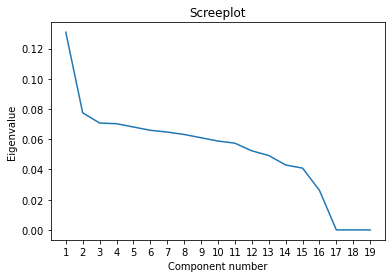

In [167]:
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(famd.explained_inertia_)+1), famd.explained_inertia_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [168]:
PC = FAMD(n_components=3, n_iter=10)
PC_fit = PC.fit(X)
PC = PC_fit.transform(X)

### KMeans with FAMD

In [169]:
## obtaining silhouette coefficient to predict optimal number of clusters
## manhattan distance is used when high dimensional data, else use euclidean
for n_cluster in range(2, 11): 
    kmeans = KMeans(n_clusters=n_cluster, n_init=100, init='k-means++').fit(PC) 
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(PC, label, metric='euclidean') 
    print("For n_clusters={}, The Silhouette Coefficient is {}".format( 
            n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2780095528833246
For n_clusters=3, The Silhouette Coefficient is 0.2826391709718006
For n_clusters=4, The Silhouette Coefficient is 0.3066905271042703
For n_clusters=5, The Silhouette Coefficient is 0.282144395464555
For n_clusters=6, The Silhouette Coefficient is 0.2744263232213109
For n_clusters=7, The Silhouette Coefficient is 0.2592656663009329
For n_clusters=8, The Silhouette Coefficient is 0.26597565661144923
For n_clusters=9, The Silhouette Coefficient is 0.2660862317791416
For n_clusters=10, The Silhouette Coefficient is 0.2551994041562508


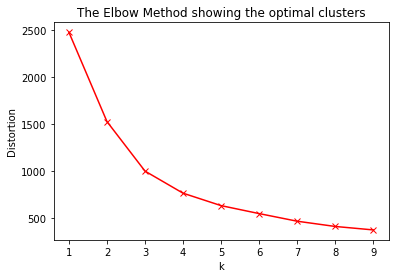

In [170]:
## plot the elbow plot to identify optimal number of clusters
## distance = large if inertia is large
## the lower the better
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init=100, init='k-means++')
  kmeanModel.fit(PC)
  distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'rx-')
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal clusters")
plt.show()

KMeans(n_clusters=2, random_state=42)


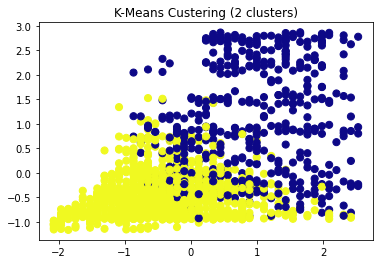

In [53]:
## k means clustering (2 clusters)
km = KMeans(n_clusters=2, init='k-means++', random_state=42) 
km.fit(PC) 
print(km)

## visualise results
y_kmeans = km.predict(PC)
X['cluster'] = y_kmeans
plt.scatter(X.iloc[:, 0], X.iloc[:, 8], c=y_kmeans, s=50, cmap='plasma')
plt.title("K-Means Custering (2 clusters)")
plt.show()

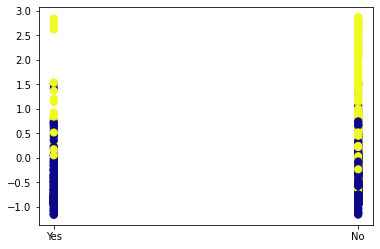

In [8]:
plt.scatter(X['Resign Status'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

In [9]:
fig = px.scatter_3d(X, x=X['Resign Status'], y=X['Age'], z=X['Salary'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

old people do not resign: due to high salary
young people resign: young, try new things, low pay

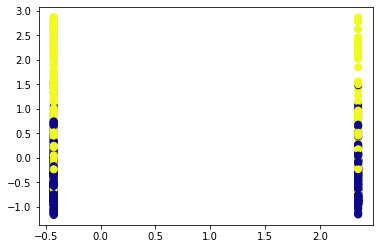

In [10]:
plt.scatter(X['Performance Rating'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

In [11]:
fig = px.scatter_3d(X, x=X['Performance Rating'], y=X['Age'], z=X['Salary'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

older people receive higher performance ratings
younger people receive lower performance ratings

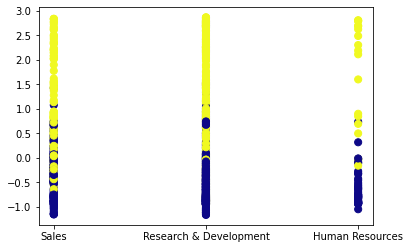

In [12]:
plt.scatter(X['Job Function'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

In [54]:
fig = px.scatter_3d(X, x=X['Job Function'], y=X['Age'], z=X['Salary'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

KMeans(max_iter=1000, n_clusters=3, n_init=100, random_state=42)


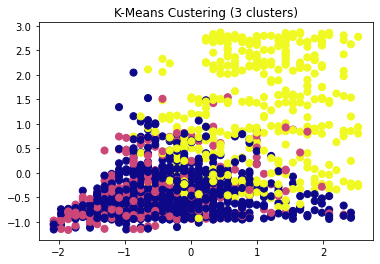

In [170]:
## k means clustering (3 clusters)
km = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000, random_state=42) 
km.fit(PC) 
print(km)

## visualise results
y_kmeans = km.predict(PC)
X['cluster'] = y_kmeans
plt.scatter(X.iloc[:, 0], X.iloc[:, 8], c=y_kmeans, s=50, cmap='plasma')
plt.title("K-Means Custering (3 clusters)")
plt.show()

In [106]:
fig = px.scatter_3d(X, x=X['Resign Status'], y=X['Age'], z=X['Salary'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

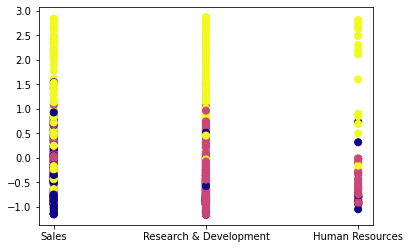

In [60]:
plt.scatter(X['Job Function'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

In [64]:
fig = px.scatter_3d(X, x=X['Job Function'], y=X['Salary'], z=X['Age'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

In [68]:
fig = px.scatter_3d(X, x=X['Job Function'], y=X['Salary'], z=X['Education'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

In [65]:
fig = px.scatter_3d(X, x=X['Business Travel'], y=X['Job Satisfaction'], z=X['Salary'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

In [61]:
X

Age  Gender    Business Travel            Job Function  Distance  \
0     0.446350  Female      Travel_Rarely                   Sales -1.010909   
1     1.322365    Male  Travel_Frequently  Research & Development -0.147150   
2     0.008343    Male      Travel_Rarely  Research & Development -0.887515   
3    -0.429664  Female  Travel_Frequently  Research & Development -0.764121   
4    -1.086676    Male      Travel_Rarely  Research & Development -0.887515   
...        ...     ...                ...                     ...       ...   
1465 -0.101159    Male  Travel_Frequently  Research & Development  1.703764   
1466  0.227347    Male      Travel_Rarely  Research & Development -0.393938   
1467 -1.086676    Male      Travel_Rarely  Research & Development -0.640727   
1468  1.322365    Male  Travel_Frequently                   Sales -0.887515   
1469 -0.320163    Male      Travel_Rarely  Research & Development -0.147150   

      Education  Job Satisfaction Marital Status    Salary  \
0     -0.891688          1.153254         Single -0.108350   
1     -1.868426         -0.660853        Married -0.291719   
2     -0.891688          0.246200         Single -0.937654   
3      1.061787          0.246200        Married -0.763634   
4     -1.868426         -0.660853        Married -0.644858   
...         ...               ...            ...       ...   
1465  -0.891688          1.153254        Married -0.835451   
1466  -1.868426         -1.567907        Married  0.741140   
1467   0.085049         -0.660853        Married -0.076690   
1468   0.085049         -0.660853        Married -0.236474   
1469   0.085049          0.246200        Married -0.445978   

      Performance Rating       WLB   Service Resign Status  cluster  
0              -0.426230 -2.493820 -0.164613           Yes        0  
1               2.346151  0.338096  0.488508            No        1  
2              -0.426230  0.338096 -1.144294           Yes        0  
3              -0.426230  0.338096  0.161947            No        1  
4              -0.426230  0.338096 -0.817734            No        1  
...                  ...       ...       ...           ...      ...  
1465           -0.426230  0.338096 -0.327893            No        1  
1466           -0.426230  0.338096 -0.001333            No        1  
1467            2.346151  0.338096 -0.164613            No        1  
1468           -0.426230 -1.077862  0.325228            No        2  
1469           -0.426230  1.754054 -0.491174            No        1  

[1470 rows x 14 columns]

In [220]:
cluster0 = X.loc[X['cluster'] == 0]
cluster1 = X.loc[X['cluster'] == 1]
cluster2 = X.loc[X['cluster'] == 2]

## gender
count0 = cluster0['Gender'].value_counts().sort_index()
count1 = cluster1['Gender'].value_counts().sort_index()
count2 = cluster2['Gender'].value_counts().sort_index()

## job function
job0 = cluster0['Job Function'].value_counts().sort_index()
job1 = cluster1['Job Function'].value_counts().sort_index()
job2 = cluster2['Job Function'].value_counts().sort_index()

## business travel
bt0 = cluster0['Business Travel'].value_counts().sort_index()
bt1 = cluster1['Business Travel'].value_counts().sort_index()
bt2 = cluster2['Business Travel'].value_counts().sort_index()

## marital status
ms0 = cluster0['Marital Status'].value_counts().sort_index()
ms1 = cluster1['Marital Status'].value_counts().sort_index()
ms2 = cluster2['Marital Status'].value_counts().sort_index()

## resign status
rs0 = cluster0['Resign Status'].value_counts().sort_index()
rs1 = cluster1['Resign Status'].value_counts().sort_index()
rs2 = cluster2['Resign Status'].value_counts().sort_index()

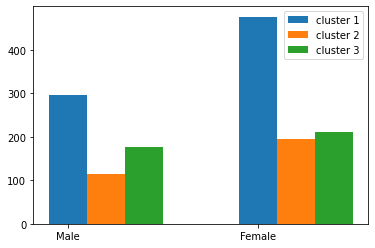

In [172]:
x = ['Male', 'Female']
x_axis = [0, 1]

plt.bar(x_axis, count0, 0.2, label='cluster 1')
plt.bar([0.2, 1.2], count1, 0.2, label='cluster 2')
plt.bar([0.4,1.4], count2, 0.2, label='cluster 3')
plt.xticks(x_axis, x)
plt.legend()

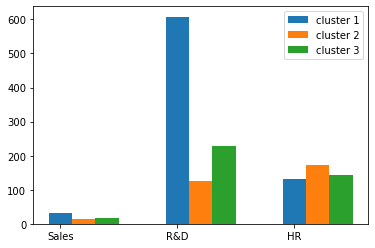

In [173]:
job = ['Sales', 'R&D', 'HR']
job_axis = [0, 1, 2]
plt.bar(job_axis, job0, 0.2, label='cluster 1')
plt.bar([0.2, 1.2, 2.2], job1, 0.2, label='cluster 2')
plt.bar([0.4, 1.4, 2.4], job2, 0.2, label='cluster 3')
plt.xticks(job_axis, job)
plt.legend()

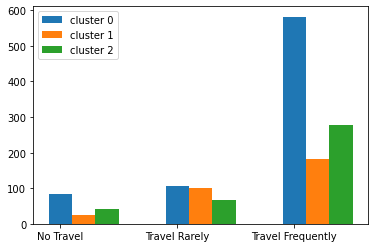

In [174]:
bt = ['No Travel', 'Travel Rarely', 'Travel Frequently']
bt_axis = [0, 1, 2]
plt.bar(bt_axis, bt0, 0.2, label='cluster 0')
plt.bar([0.2, 1.2, 2.2], bt1, 0.2, label='cluster 1')
plt.bar([0.4, 1.4, 2.4], bt2, 0.2, label='cluster 2')
plt.xticks(bt_axis, bt)
plt.legend()

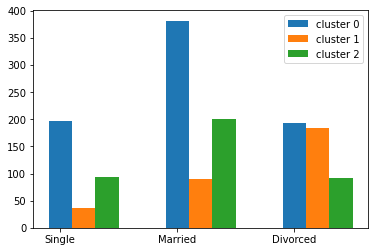

In [207]:
ms = ['Single', 'Married', 'Divorced']
ms_axis = [0, 1, 2]
plt.bar(ms_axis, ms0, 0.2, label='cluster 0')
plt.bar([0.2, 1.2, 2.2], ms1, 0.2, label='cluster 1')
plt.bar([0.4, 1.4, 2.4], ms2, 0.2, label='cluster 2')
plt.xticks(ms_axis, ms)
plt.legend()

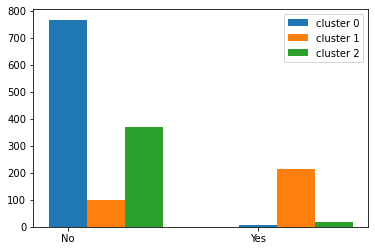

In [208]:
rs = ['No', 'Yes']
rs_axis = [0, 1]

plt.bar(rs_axis, rs0, 0.2, label='cluster 0')
plt.bar([0.2, 1.2], rs1, 0.2, label='cluster 1')
plt.bar([0.4, 1.4], rs2, 0.2, label='cluster 2')
plt.xticks(rs_axis, rs)
plt.legend()

NOTES:
- data likely has to be feature scaled (standardisation/normalisation)
- scaled sil coeff very low, highly due to poor data preprocessing
- high dimensionality returns optimal clusters of 2, is this normal?

### Gaussian Mixture Model GMM

In [896]:
X = pd.read_csv('Company_Employee.csv')

## renaming columns to easier names
X.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status' ]

In [897]:
## deal with 'Business Travel' column
bt = X['Business Travel']
for i in range(len(bt)):
    if bt[i] == 'Non-Travel':
        bt.loc[i] = 1
    elif bt[i] == 'Travel_Rarely':
        bt.loc[i] = 2
    elif bt[i] == 'Travel_Frequently':
        bt.loc[i] = 3
        
X['Business Travel'] = X['Business Travel'].astype('int')


## deal with 'Job Function' column
jf = X['Job Function']
for i in range(len(jf)):
    if jf[i] == 'Sales':
        jf.loc[i] = 1
    elif jf[i] == 'Research & Development':
        jf.loc[i] = 2
    elif jf[i] == 'Human Resources':
        jf.loc[i] = 3
        
X['Job Function'] = X['Job Function'].astype('int')  


## deal with 'Marital Status' column
ms = X['Marital Status']
for i in range(len(ms)):
    if ms[i] == 'Single':
        ms.loc[i] = 1
    elif ms[i] == 'Married':
        ms.loc[i] = 2
    elif ms[i] == 'Divorced':
        ms.loc[i] = 3

X['Marital Status'] = X['Marital Status'].astype('int')


## deal with 'Resign Status' column
rs = X['Resign Status']
for i in range(len(rs)):
    if rs[i] == 'No':
        rs.loc[i] = 0
    elif rs[i] == 'Yes':
        rs.loc[i] = 1
    
X['Resign Status'] = X['Resign Status'].astype('int')

## deal with 'Gender' column
gender = X['Gender']
for i in range(len(gender)):
    if gender[i] == 'Female':
        gender.loc[i] = 1
    elif gender[i] == 'Male':
        gender.loc[i] = 2

X['Gender'] = X['Gender'].astype('int')

In [898]:
scaler = StandardScaler()  
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status'])
X

Age    Gender  Business Travel  Job Function  Distance  Education  \
0     0.446350 -1.224745        -0.162399     -1.401512 -1.010909  -0.891688   
1     1.322365  0.816497         1.717339      0.493817 -0.147150  -1.868426   
2     0.008343  0.816497        -0.162399      0.493817 -0.887515  -0.891688   
3    -0.429664 -1.224745         1.717339      0.493817 -0.764121   1.061787   
4    -1.086676  0.816497        -0.162399      0.493817 -0.887515  -1.868426   
...        ...       ...              ...           ...       ...        ...   
1465 -0.101159  0.816497         1.717339      0.493817  1.703764  -0.891688   
1466  0.227347  0.816497        -0.162399      0.493817 -0.393938  -1.868426   
1467 -1.086676  0.816497        -0.162399      0.493817 -0.640727   0.085049   
1468  1.322365  0.816497         1.717339     -1.401512 -0.887515   0.085049   
1469 -0.320163  0.816497        -0.162399      0.493817 -0.147150   0.085049   

      Job Satisfaction  Marital Status    Salary  Performance Rating  \
0             1.153254       -1.236820 -0.108350           -0.426230   
1            -0.660853        0.133282 -0.291719            2.346151   
2             0.246200       -1.236820 -0.937654           -0.426230   
3             0.246200        0.133282 -0.763634           -0.426230   
4            -0.660853        0.133282 -0.644858           -0.426230   
...                ...             ...       ...                 ...   
1465          1.153254        0.133282 -0.835451           -0.426230   
1466         -1.567907        0.133282  0.741140           -0.426230   
1467         -0.660853        0.133282 -0.076690            2.346151   
1468         -0.660853        0.133282 -0.236474           -0.426230   
1469          0.246200        0.133282 -0.445978           -0.426230   

           WLB   Service  Resign Status  
0    -2.493820 -0.164613       2.280906  
1     0.338096  0.488508      -0.438422  
2     0.338096 -1.144294       2.280906  
3     0.338096  0.161947      -0.438422  
4     0.338096 -0.817734      -0.438422  
...        ...       ...            ...  
1465  0.338096 -0.327893      -0.438422  
1466  0.338096 -0.001333      -0.438422  
1467  0.338096 -0.164613      -0.438422  
1468 -1.077862  0.325228      -0.438422  
1469  1.754054 -0.491174      -0.438422  

[1470 rows x 13 columns]

In [669]:
for n_component in range(2, 13): 
    gmm = GaussianMixture(n_components=n_component, n_init=20, init_params='kmeans').fit(X) 
    label = gmm.fit_predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean') 
    print("For n_components={}, The Silhouette Coefficient is {}".format( 
            n_component, sil_coeff))

For n_components=2, The Silhouette Coefficient is 0.15371169547995397
For n_components=3, The Silhouette Coefficient is 0.15040712886171204
For n_components=4, The Silhouette Coefficient is 0.14030551803433816
For n_components=5, The Silhouette Coefficient is 0.09932211492691807
For n_components=6, The Silhouette Coefficient is 0.09820850506708635
For n_components=7, The Silhouette Coefficient is 0.09784137432773816
For n_components=8, The Silhouette Coefficient is 0.0743387119891165
For n_components=9, The Silhouette Coefficient is 0.07676631499308574
For n_components=10, The Silhouette Coefficient is 0.07487967742847916
For n_components=11, The Silhouette Coefficient is 0.07452214107187836
For n_components=12, The Silhouette Coefficient is 0.054626633655306664


In [899]:
def SelBest(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [900]:
## Bayesian information criterion (BIC)
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X) 
        tmp_bic.append(gmm.bic(X))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

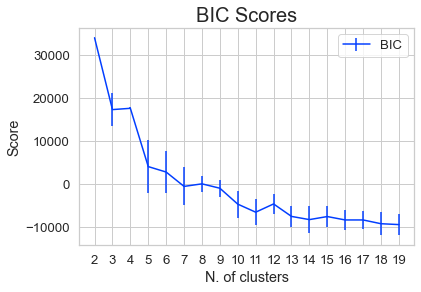

In [901]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.legend()

In [902]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [903]:
from sklearn.model_selection import train_test_split
n_clusters=np.arange(2, 18)
iterations=18
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

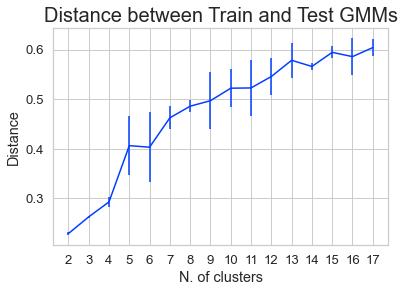

In [904]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

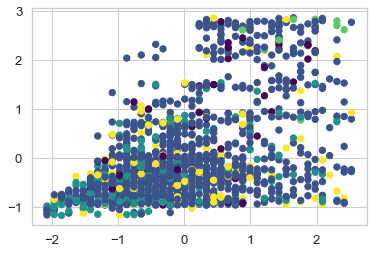

In [906]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.scatter(X['Age'], X['Salary'], c=labels, s=40, cmap='viridis');

## Gower's Distance

In [679]:
X = pd.read_csv('Company_Employee.csv')

## renaming columns to easier names
X.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status' ]
X

Age  Gender    Business Travel            Job Function  Distance  \
0      41  Female      Travel_Rarely                   Sales         1   
1      49    Male  Travel_Frequently  Research & Development         8   
2      37    Male      Travel_Rarely  Research & Development         2   
3      33  Female  Travel_Frequently  Research & Development         3   
4      27    Male      Travel_Rarely  Research & Development         2   
...   ...     ...                ...                     ...       ...   
1465   36    Male  Travel_Frequently  Research & Development        23   
1466   39    Male      Travel_Rarely  Research & Development         6   
1467   27    Male      Travel_Rarely  Research & Development         4   
1468   49    Male  Travel_Frequently                   Sales         2   
1469   34    Male      Travel_Rarely  Research & Development         8   

      Education  Job Satisfaction Marital Status  Salary  Performance Rating  \
0             2                 4         Single    5993                   3   
1             1                 2        Married    5130                   4   
2             2                 3         Single    2090                   3   
3             4                 3        Married    2909                   3   
4             1                 2        Married    3468                   3   
...         ...               ...            ...     ...                 ...   
1465          2                 4        Married    2571                   3   
1466          1                 1        Married    9991                   3   
1467          3                 2        Married    6142                   4   
1468          3                 2        Married    5390                   3   
1469          3                 3        Married    4404                   3   

      WLB  Service Resign Status  
0       1        6           Yes  
1       3       10            No  
2       3        0           Yes  
3       3        8            No  
4       3        2            No  
...   ...      ...           ...  
1465    3        5            No  
1466    3        7            No  
1467    3        6            No  
1468    2        9            No  
1469    4        4            No  

[1470 rows x 13 columns]

In [680]:
gowerDF = X.astype(str)
gowerDF

Age  Gender    Business Travel            Job Function Distance  \
0     41  Female      Travel_Rarely                   Sales        1   
1     49    Male  Travel_Frequently  Research & Development        8   
2     37    Male      Travel_Rarely  Research & Development        2   
3     33  Female  Travel_Frequently  Research & Development        3   
4     27    Male      Travel_Rarely  Research & Development        2   
...   ..     ...                ...                     ...      ...   
1465  36    Male  Travel_Frequently  Research & Development       23   
1466  39    Male      Travel_Rarely  Research & Development        6   
1467  27    Male      Travel_Rarely  Research & Development        4   
1468  49    Male  Travel_Frequently                   Sales        2   
1469  34    Male      Travel_Rarely  Research & Development        8   

     Education Job Satisfaction Marital Status Salary Performance Rating WLB  \
0            2                4         Single   5993                  3   1   
1            1                2        Married   5130                  4   3   
2            2                3         Single   2090                  3   3   
3            4                3        Married   2909                  3   3   
4            1                2        Married   3468                  3   3   
...        ...              ...            ...    ...                ...  ..   
1465         2                4        Married   2571                  3   3   
1466         1                1        Married   9991                  3   3   
1467         3                2        Married   6142                  4   3   
1468         3                2        Married   5390                  3   2   
1469         3                3        Married   4404                  3   4   

     Service Resign Status  
0          6           Yes  
1         10            No  
2          0           Yes  
3          8            No  
4          2            No  
...      ...           ...  
1465       5            No  
1466       7            No  
1467       6            No  
1468       9            No  
1469       4            No  

[1470 rows x 13 columns]

In [681]:
distance_matrix = gower.gower_matrix(gowerDF)

In [682]:
distance_matrix = pd.DataFrame(distance_matrix)
distance_matrix

0         1         2         3         4         5         6     \
0     0.000000  1.000000  0.615385  0.846154  0.846154  0.692308  0.846154   
1     1.000000  0.000000  0.769231  0.615385  0.461538  0.692308  0.692308   
2     0.615385  0.769231  0.000000  0.692308  0.538462  0.538462  0.846154   
3     0.846154  0.615385  0.692308  0.000000  0.615385  0.692308  0.615385   
4     0.846154  0.461538  0.538462  0.615385  0.000000  0.615385  0.692308   
...        ...       ...       ...       ...       ...       ...       ...   
1465  0.769231  0.538462  0.615385  0.538462  0.538462  0.461538  0.769231   
1466  0.846154  0.538462  0.615385  0.615385  0.384615  0.615385  0.615385   
1467  0.846154  0.461538  0.692308  0.692308  0.384615  0.769231  0.538462   
1468  0.846154  0.538462  0.769231  0.692308  0.538462  0.538462  0.692308   
1469  0.846154  0.615385  0.615385  0.615385  0.538462  0.692308  0.615385   

          7         8         9     ...      1460      1461      1462  \
0     0.923077  0.923077  0.846154  ...  0.615385  0.692308  0.615385   
1     0.538462  0.538462  0.692308  ...  0.846154  0.846154  0.769231   
2     0.615385  0.615385  0.615385  ...  0.692308  0.615385  0.846154   
3     0.692308  0.615385  0.615385  ...  0.615385  0.846154  0.692308   
4     0.538462  0.692308  0.538462  ...  0.692308  0.692308  0.615385   
...        ...       ...       ...  ...       ...       ...       ...   
1465  0.692308  0.538462  0.538462  ...  0.692308  0.769231  0.692308   
1466  0.538462  0.692308  0.461538  ...  0.615385  0.615385  0.538462   
1467  0.538462  0.538462  0.538462  ...  0.769231  0.692308  0.769231   
1468  0.846154  0.615385  0.538462  ...  0.846154  0.692308  0.615385   
1469  0.615385  0.615385  0.384615  ...  0.692308  0.692308  0.692308   

          1463      1464      1465      1466      1467      1468      1469  
0     0.846154  0.615385  0.769231  0.846154  0.846154  0.846154  0.846154  
1     0.692308  0.846154  0.538462  0.538462  0.461538  0.538462  0.615385  
2     0.615385  0.615385  0.615385  0.615385  0.692308  0.769231  0.615385  
3     0.692308  0.615385  0.538462  0.615385  0.692308  0.692308  0.615385  
4     0.615385  0.692308  0.538462  0.384615  0.384615  0.538462  0.538462  
...        ...       ...       ...       ...       ...       ...       ...  
1465  0.615385  0.769231  0.000000  0.538462  0.615385  0.615385  0.615385  
1466  0.538462  0.692308  0.538462  0.000000  0.538462  0.692308  0.538462  
1467  0.615385  0.692308  0.615385  0.538462  0.000000  0.615385  0.538462  
1468  0.615385  0.692308  0.615385  0.692308  0.615385  0.000000  0.615385  
1469  0.615385  0.538462  0.615385  0.538462  0.538462  0.615385  0.000000  

[1470 rows x 1470 columns]

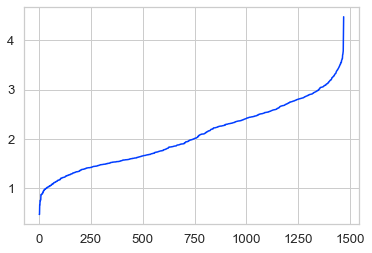

In [683]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(distance_matrix)
distances, indices = neighbors_fit.kneighbors(distance_matrix)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [684]:
dbscan_cluster = DBSCAN(eps=3, 
                        min_samples=24, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
X["cluster"] = dbscan_cluster.labels_

<AxesSubplot:xlabel='Age', ylabel='Salary'>

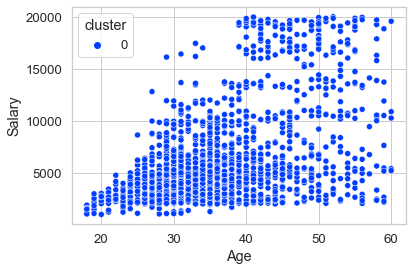

In [685]:
sns.scatterplot(data=X, x='Age', y='Salary', hue='cluster')

## K-Prototypes

In [22]:
X = pd.read_csv('Company_Employee.csv')

## renaming columns to easier names
X.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status' ]
X

Age  Gender    Business Travel            Job Function  Distance  \
0      41  Female      Travel_Rarely                   Sales         1   
1      49    Male  Travel_Frequently  Research & Development         8   
2      37    Male      Travel_Rarely  Research & Development         2   
3      33  Female  Travel_Frequently  Research & Development         3   
4      27    Male      Travel_Rarely  Research & Development         2   
...   ...     ...                ...                     ...       ...   
1465   36    Male  Travel_Frequently  Research & Development        23   
1466   39    Male      Travel_Rarely  Research & Development         6   
1467   27    Male      Travel_Rarely  Research & Development         4   
1468   49    Male  Travel_Frequently                   Sales         2   
1469   34    Male      Travel_Rarely  Research & Development         8   

      Education  Job Satisfaction Marital Status  Salary  Performance Rating  \
0             2                 4         Single    5993                   3   
1             1                 2        Married    5130                   4   
2             2                 3         Single    2090                   3   
3             4                 3        Married    2909                   3   
4             1                 2        Married    3468                   3   
...         ...               ...            ...     ...                 ...   
1465          2                 4        Married    2571                   3   
1466          1                 1        Married    9991                   3   
1467          3                 2        Married    6142                   4   
1468          3                 2        Married    5390                   3   
1469          3                 3        Married    4404                   3   

      WLB  Service Resign Status  
0       1        6           Yes  
1       3       10            No  
2       3        0           Yes  
3       3        8            No  
4       3        2            No  
...   ...      ...           ...  
1465    3        5            No  
1466    3        7            No  
1467    3        6            No  
1468    2        9            No  
1469    4        4            No  

[1470 rows x 13 columns]

In [23]:
scaled_X = StandardScaler().fit_transform(X[['Age', 'Distance', 'Education', 'Job Satisfaction', 'Salary', 'Performance Rating', 'WLB', 'Service']])
X[['Age', 'Distance', 'Education', 'Job Satisfaction', 'Salary', 'Performance Rating', 'WLB', 'Service']] = scaled_X


x_array = X.values
x_array[:,0] = x_array[:,0].astype('float')
x_array[:,4] = x_array[:,4].astype('float')
x_array[:,5] = x_array[:,5].astype('float')
x_array[:,6] = x_array[:,6].astype('float')
x_array[:,8] = x_array[:,8].astype('float')
x_array[:,9] = x_array[:,9].astype('float')
x_array[:,10] = x_array[:,10].astype('float')

categorical_index = list((1, 2, 3, 7, 12))


In [321]:
x_array

array([[0.4463504035345031, 'Female', 'Travel_Rarely', ...,
        -2.4938204216722384, -0.16461310905422863, 'Yes'],
       [1.3223652142096962, 'Male', 'Travel_Frequently', ...,
        0.33809616377248186, 0.48850772848886465, 'No'],
       [0.008342998196906572, 'Male', 'Travel_Rarely', ...,
        0.33809616377248186, -1.1442943653688686, 'Yes'],
       ...,
       [-1.0866755151470848, 'Male', 'Travel_Rarely', ...,
        0.33809616377248186, -0.16461310905422863, 'No'],
       [1.3223652142096962, 'Male', 'Travel_Frequently', ...,
        -1.0778621289498782, 0.32522751910309133, 'No'],
       [-0.3201625558062908, 'Male', 'Travel_Rarely', ...,
        1.754054456494842, -0.4911735278257753, 'No']], dtype=object)

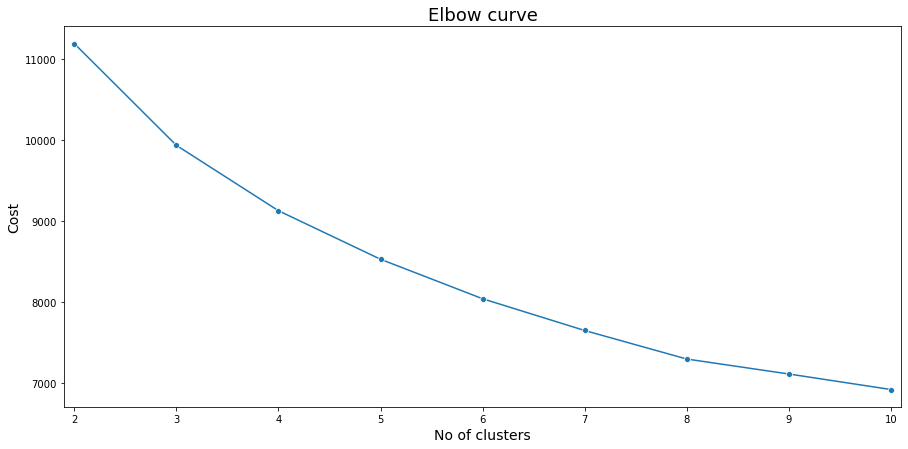

In [24]:
# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
    
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    
# Plotting elbow curve for k=2 to k=10
plot_elbow_curve(2,10, x_array)

In [25]:
### kprototypes (2 clusters)
model_3 = KPrototypes(n_clusters=2, max_iter = 500, init='Huang', random_state=42, n_jobs=-1)
model_3.fit_predict(x_array, categorical=categorical_index)
print(model_3.cost_)
#new column for cluster labels associated with each subject
X['cluster'] = model_3.labels_
X.groupby('cluster').agg(['mean']).T

11191.170113788925


cluster                         0         1
Age                mean -0.315532  1.069040
Distance           mean  0.015165 -0.051381
Education          mean -0.064688  0.219168
Job Satisfaction   mean  0.000057 -0.000193
Salary             mean -0.422430  1.431218
Performance Rating mean  0.013443 -0.045545
WLB                mean -0.007473  0.025317
Service            mean -0.297251  1.007105

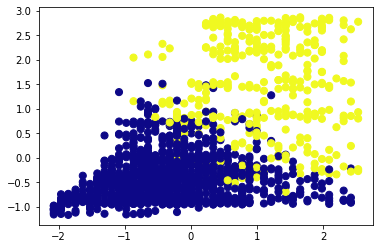

In [26]:
plt.scatter(X['Age'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

blue cluster: cluster 0
yellow cluster: cluster 1

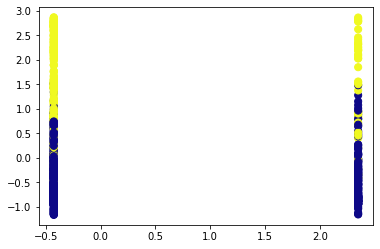

In [27]:
plt.scatter(X['Performance Rating'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

In [28]:
fig = px.scatter_3d(X, x=X['Job Function'], y=X['Salary'], z=X['Service'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

- most hr employees are young, do not earn much
- only older employees earn a higher bracket of salary
- older employees have been with the company longer
- large portion of rnd employees have not been with the company for long

In [29]:
fig = px.scatter_3d(X, x=X['Resign Status'], y=X['Age'], z=X['Salary'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

- majority of older employees do not resign, likely due to high pay, due to long service
- younger employees are split rather evenly in resignation status, likely due to individuals wanting to try different things while still young, and low pay

In [33]:
X

Age  Gender    Business Travel            Job Function  Distance  \
0     0.446350  Female      Travel_Rarely                   Sales -1.010909   
1     1.322365    Male  Travel_Frequently  Research & Development -0.147150   
2     0.008343    Male      Travel_Rarely  Research & Development -0.887515   
3    -0.429664  Female  Travel_Frequently  Research & Development -0.764121   
4    -1.086676    Male      Travel_Rarely  Research & Development -0.887515   
...        ...     ...                ...                     ...       ...   
1465 -0.101159    Male  Travel_Frequently  Research & Development  1.703764   
1466  0.227347    Male      Travel_Rarely  Research & Development -0.393938   
1467 -1.086676    Male      Travel_Rarely  Research & Development -0.640727   
1468  1.322365    Male  Travel_Frequently                   Sales -0.887515   
1469 -0.320163    Male      Travel_Rarely  Research & Development -0.147150   

      Education  Job Satisfaction Marital Status    Salary  \
0     -0.891688          1.153254         Single -0.108350   
1     -1.868426         -0.660853        Married -0.291719   
2     -0.891688          0.246200         Single -0.937654   
3      1.061787          0.246200        Married -0.763634   
4     -1.868426         -0.660853        Married -0.644858   
...         ...               ...            ...       ...   
1465  -0.891688          1.153254        Married -0.835451   
1466  -1.868426         -1.567907        Married  0.741140   
1467   0.085049         -0.660853        Married -0.076690   
1468   0.085049         -0.660853        Married -0.236474   
1469   0.085049          0.246200        Married -0.445978   

      Performance Rating       WLB   Service Resign Status  cluster  
0              -0.426230 -2.493820 -0.164613           Yes        0  
1               2.346151  0.338096  0.488508            No        0  
2              -0.426230  0.338096 -1.144294           Yes        0  
3              -0.426230  0.338096  0.161947            No        0  
4              -0.426230  0.338096 -0.817734            No        0  
...                  ...       ...       ...           ...      ...  
1465           -0.426230  0.338096 -0.327893            No        0  
1466           -0.426230  0.338096 -0.001333            No        0  
1467            2.346151  0.338096 -0.164613            No        0  
1468           -0.426230 -1.077862  0.325228            No        0  
1469           -0.426230  1.754054 -0.491174            No        0  

[1470 rows x 14 columns]

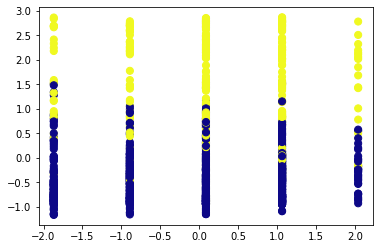

In [34]:
plt.scatter(X['Education'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

In [36]:
fig = px.scatter_3d(X, x=X['Education'], y=X['Resign Status'], z=X['Salary'], color=X['cluster'], color_continuous_scale='plasma')
fig.show()

In [41]:
cluster0['Education'].value_counts()

 0.085049    441
 1.061787    286
-0.891688    232
-1.868426    145
 2.038524     31
Name: Education, dtype: int64

In [42]:
cluster1['Education'].value_counts()

 0.085049    131
 1.061787    112
-0.891688     50
-1.868426     25
 2.038524     17
Name: Education, dtype: int64

In [31]:
## subset clusters
cluster0 = X.loc[X['cluster'] == 0]
cluster1 = X.loc[X['cluster'] == 1]

## gender
count0 = cluster0['Gender'].value_counts()
count1 = cluster1['Gender'].value_counts()

## job function
job0 = cluster0['Job Function'].value_counts()
job1 = cluster1['Job Function'].value_counts()

## business travel
bt0 = cluster0['Business Travel'].value_counts()
bt1 = cluster1['Business Travel'].value_counts()

## marital status
ms0 = cluster0['Marital Status'].value_counts()
ms1 = cluster1['Marital Status'].value_counts()

## resign status
rs0 = cluster0['Resign Status'].value_counts()
rs1 = cluster1['Resign Status'].value_counts()

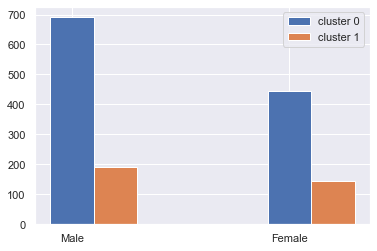

In [370]:
x = ['Male', 'Female']
x_axis = [0, 1]

plt.bar(x_axis, count0, 0.2, label='cluster 0')
plt.bar([0.2, 1.2], count1, 0.2, label='cluster 1')
plt.xticks(x_axis, x)
plt.legend()

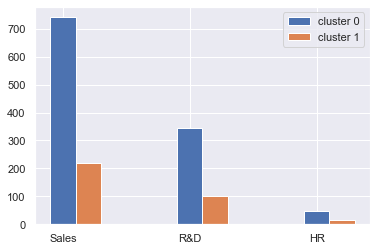

In [371]:
job = ['Sales', 'R&D', 'HR']
job_axis = [0, 1, 2]
plt.bar(job_axis, job0, 0.2, labDSSel='cluster 0')
plt.bar([0.2, 1.2, 2.2], job1, 0.2, label='cluster 1')
plt.xticks(job_axis, job)
plt.legend()

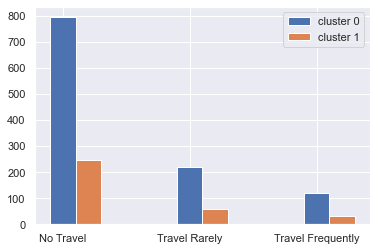

In [372]:
bt = ['No Travel', 'Travel Rarely', 'Travel Frequently']
bt_axis = [0, 1, 2]
plt.bar(bt_axis, bt0, 0.2, label='cluster 0')
plt.bar([0.2, 1.2, 2.2], bt1, 0.2, label='cluster 1')
plt.xticks(bt_axis, bt)
plt.legend()

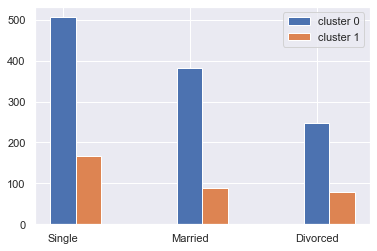

In [374]:
ms = ['Single', 'Married', 'Divorced']
ms_axis = [0, 1, 2]
plt.bar(ms_axis, ms0, 0.2, label='cluster 0')
plt.bar([0.2, 1.2, 2.2], ms1, 0.2, label='cluster 1')
plt.xticks(ms_axis, ms)
plt.legend()

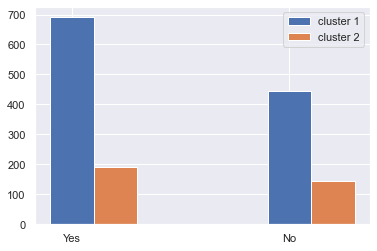

In [359]:
rs = ['Yes', 'No']
rs_axis = [0, 1]

plt.bar(rs_axis, count0, 0.2, label='cluster 0')
plt.bar([0.2, 1.2], count1, 0.2, label='cluster 1')
plt.xticks(rs_axis, rs)
plt.legend()

In [38]:
### kprototypes (3 clusters)
model_3 = KPrototypes(n_clusters=3, max_iter = 500, init='Huang', random_state=42, n_jobs=-1)
model_3.fit_predict(x_array, categorical=categorical_index)
print(model_3.cost_)
#new column for cluster labels associated with each subject
X['cluster'] = model_3.labels_

X.groupby('cluster').agg(['mean']).T

9936.758892864167


cluster                         0         1         2
Age                mean  1.088735 -0.100635 -0.285109
Distance           mean -0.043801  0.061263 -0.000682
Education          mean  0.176729 -0.087866 -0.031087
Job Satisfaction   mean -0.009216  0.007502  0.001001
Salary             mean  1.605469 -0.221809 -0.404834
Performance Rating mean -0.256084  2.346151 -0.426230
WLB                mean  0.000720 -0.000650 -0.000065
Service            mean  1.138681 -0.141957 -0.290392

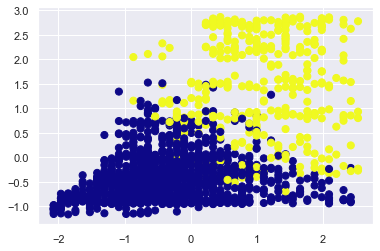

In [312]:
plt.scatter(X['Age'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

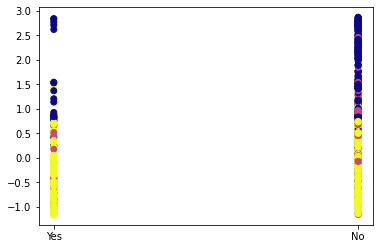

In [40]:
plt.scatter(X['Resign Status'], X['Salary'], c=X['cluster'], cmap='plasma')

In [313]:
fig = px.scatter_3d(X, x=X['Resign Status'], y=X['Age'], z=X['Salary'], color=X['cluster'])
fig.show()

### Agglomerative Clustering

In [43]:
X = pd.read_csv('Company_Employee.csv')

## renaming columns to easier names
X.columns = ['Age', 'Gender', 'Business Travel', 'Job Function', 'Distance', 'Education', 'Job Satisfaction', 'Marital Status', 'Salary', 'Performance Rating', 'WLB', 'Service', 'Resign Status' ]

In [44]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(PC)
clusters = pd.DataFrame(clustering.labels_)
X['clusters'] = clustering.labels_
X

Age  Gender    Business Travel            Job Function  Distance  \
0      41  Female      Travel_Rarely                   Sales         1   
1      49    Male  Travel_Frequently  Research & Development         8   
2      37    Male      Travel_Rarely  Research & Development         2   
3      33  Female  Travel_Frequently  Research & Development         3   
4      27    Male      Travel_Rarely  Research & Development         2   
...   ...     ...                ...                     ...       ...   
1465   36    Male  Travel_Frequently  Research & Development        23   
1466   39    Male      Travel_Rarely  Research & Development         6   
1467   27    Male      Travel_Rarely  Research & Development         4   
1468   49    Male  Travel_Frequently                   Sales         2   
1469   34    Male      Travel_Rarely  Research & Development         8   

      Education  Job Satisfaction Marital Status  Salary  Performance Rating  \
0             2                 4         Single    5993                   3   
1             1                 2        Married    5130                   4   
2             2                 3         Single    2090                   3   
3             4                 3        Married    2909                   3   
4             1                 2        Married    3468                   3   
...         ...               ...            ...     ...                 ...   
1465          2                 4        Married    2571                   3   
1466          1                 1        Married    9991                   3   
1467          3                 2        Married    6142                   4   
1468          3                 2        Married    5390                   3   
1469          3                 3        Married    4404                   3   

      WLB  Service Resign Status  clusters  
0       1        6           Yes         2  
1       3       10            No         0  
2       3        0           Yes         2  
3       3        8            No         0  
4       3        2            No         0  
...   ...      ...           ...       ...  
1465    3        5            No         0  
1466    3        7            No         0  
1467    3        6            No         0  
1468    2        9            No         0  
1469    4        4            No         0  

[1470 rows x 14 columns]

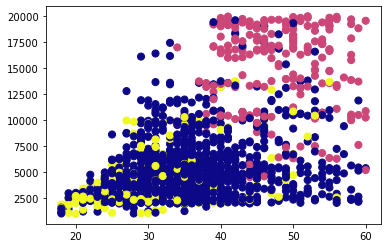

In [45]:
plt.scatter(X['Age'], X['Salary'], c=X['clusters'], s=50, cmap='plasma')

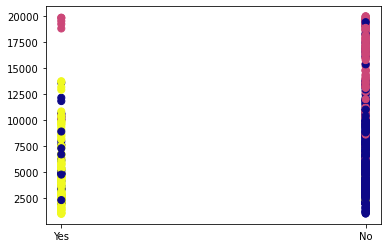

In [46]:
plt.scatter(X['Resign Status'], X['Salary'], c=X['clusters'], s=50, cmap='plasma')

In [47]:
fig = px.scatter_3d(X, x=X['Resign Status'], y=X['Age'], z=X['Salary'], color=X['clusters'])
fig.show()

In [48]:
fig = px.scatter_3d(X, x=X['Job Function'], y=X['Age'], z=X['Salary'], color=X['clusters'])
fig.show()

### Spectral Clustering

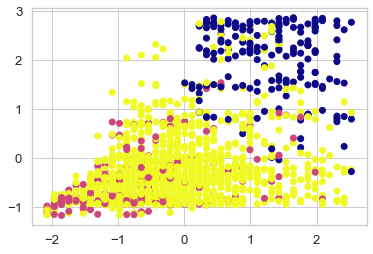

In [806]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42).fit(PC)
X['cluster'] = clustering.labels_
plt.scatter(X['Age'], X['Salary'], c=X['cluster'], cmap='plasma')

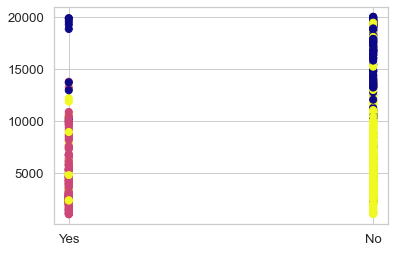

In [798]:
plt.scatter(X['Resign Status'], X['Salary'], c=X['cluster'], s=50, cmap='plasma')

### REFERENCES
##### https://machinelearningmastery.com/clustering-algorithms-with-python/
##### https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086
##### https://bpostance.github.io/posts/clustering-mixed-data/
##### https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad
##### https://cran.r-project.org/web/packages/gower/vignettes/intro.pdf
##### https://medium.com/analytics-vidhya/concept-of-gowers-distance-and-it-s-application-using-python-b08cf6139ac2
##### https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
##### https://www.tomasbeuzen.com/post/clustering-mixed-data/
